# MODELO CHURN





## INTRODUCCION

El objetivo de la prueba consiste en calcular el **churn** de clientes para Colombina, el cual consiste en saber qué clientes tienen mayor probabilidad de no volver a comprar. El negocio ha establecido que un cliente que no compra durante 2 meses es un cliente fugado.



## DESCRIPCIÓN DE VARIABLES:
**CLIENTES**
- **Doc_vtas**: Id de pedido.
- **Fecha:** Fecha del pedido.
- **Solic:** Código del cliente.
- **Material:** Cantidad pedida en unidad venta.
- **sect_mat:** código del sector del producto.
- **Cnt_cart:** Cantidad pedidos en unidad cartón.
- **ValN_Pos:** Valor neto en dinero.
- **Moneda:** Moneda.



## TABLA DE CONTENIDO:

    1. Cargar las librerias necesarias para la practica
    2. Cargue de Datos
    3. Prepocesado y limplieza de datos
    4. Creacion la variable Target
    5. Correr un modelo inicial y evaluar sus resultados
    6. Mejorar el modelo:
    7. Correr modelos y evaluar resultados 
    8. Conclusiones
    9. Prediccion


## 1) Cargue de Paquetes Phyton

Se cargan las librerias necesarias para el analisis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold # eliminacion por variaza, las variables mas importantes del modelo o le dices cuales son las m[as importantes, le dices las k variables]

## 2) Cargue de Datos


Se carga toda la informacion, teniendo en cuenta el separador del archivo CSV, visualizacion del tipo de variables y estructura

In [3]:
datos_prueba = pd.read_csv('./datos/prueba_DS.txt', sep = ',')

In [4]:
datos_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559901 entries, 0 to 12559900
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Doc_vtas  int64  
 1   Fecha     object 
 2   Solic     int64  
 3   Material  int64  
 4   Cnt_uni   float64
 5   sect_mat  int64  
 6   Cnt_cart  float64
 7   ValN_Pos  float64
 8   Moneda    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 862.4+ MB


In [5]:
datos_prueba.describe()

,Doc_vtas,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos
count,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07
mean,7.504470e+09,6.790095e+06,2.309706e+04,3.444836e+00,4.419418e+01,1.092986e+00,8.999391e+01
std,6.787329e+05,8.030957e+06,1.808602e+04,3.343890e+02,1.831512e+01,3.342218e+02,5.830246e+02
min,7.503278e+09,4.912800e+04,2.940000e+02,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00
25%,7.503889e+09,1.130028e+06,6.576000e+03,1.000000e+00,3.000000e+01,5.555600e-02,4.087000e+01
50%,7.504469e+09,1.398056e+06,2.474600e+04,1.000000e+00,3.600000e+01,8.333300e-02,5.402000e+01
75%,7.505061e+09,1.805645e+07,2.885400e+04,3.000000e+00,6.000000e+01,1.250000e-01,8.560000e+01
max,7.505636e+09,1.817967e+07,6.096400e+04,2.000000e+05,2.610000e+02,2.000000e+05,1.242856e+06


## 3) Preprocesado y Limpieza


Se validan valores nulos, outliers, NAs, etc

### Valores Nulos

Se observa que no existen valores nulos

In [6]:
datos_prueba.isnull().sum() 

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

Tampoco existen Valores faltantes

In [601]:
datos_prueba.isna().sum() 

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

### Se valida la informacion de la base de datos

In [602]:
validacion = datos_prueba[datos_prueba["Cnt_uni"]<0].count()

In [603]:
validacion

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

In [604]:
validacion = datos_prueba[datos_prueba["ValN_Pos"]<0].count()   

In [605]:
validacion

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

In [606]:
validacion = datos_prueba[datos_prueba["Cnt_cart"]<0].count() 
validacion

Doc_vtas    0
Fecha       0
Solic       0
Material    0
Cnt_uni     0
sect_mat    0
Cnt_cart    0
ValN_Pos    0
Moneda      0
dtype: int64

Como se observo en la descripcion de las variables existen pedidos con El valor neto en ceros, se observan 769 registros. 

#### Voy a validar Ceros

In [607]:
validacion = datos_prueba[datos_prueba["ValN_Pos"]==0].count() 
validacion

Doc_vtas    769
Fecha       769
Solic       769
Material    769
Cnt_uni     769
sect_mat    769
Cnt_cart    769
ValN_Pos    769
Moneda      769
dtype: int64

In [608]:
# validacion variable: ValN_Pos
ceros = datos_prueba[datos_prueba["ValN_Pos"]==0]
ceros

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda
169866,7503350962,2021-11-08,1096012,27014,0.0,84,0.0,0.0,COP
209834,7503816489,2021-12-28,1001452,26650,1.0,54,1.0,0.0,COP
209835,7503816489,2021-12-28,1001452,55616,1.0,66,1.0,0.0,COP
237229,7503757639,2021-12-20,1315570,26814,1.0,51,1.0,0.0,COP
675380,7504011306,2022-01-24,1387378,26928,1.0,36,1.0,0.0,COP
...,...,...,...,...,...,...,...,...,...
12436732,7505097146,2022-05-18,18142044,27300,1.0,30,1.0,0.0,COP
12437578,7505097319,2022-05-19,18073204,27298,1.0,30,1.0,0.0,COP
12443374,7505098296,2022-05-19,1458198,40908,1.0,60,1.0,0.0,COP
12529328,7504713738,2022-04-07,1431640,27284,2.0,30,2.0,0.0,COP


In [609]:
ceros.describe()

,Doc_vtas,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos
count,7.690000e+02,7.690000e+02,769.000000,769.000000,769.000000,769.000000,769.0
mean,7.504712e+09,7.711768e+06,29068.910273,1.340702,42.296489,1.263580,0.0
std,6.119693e+05,8.291277e+06,6488.622348,0.893215,22.173804,0.828855,0.0
min,7.503351e+09,9.381400e+04,436.000000,0.000000,30.000000,0.000000,0.0
25%,7.504067e+09,1.207028e+06,26958.000000,1.000000,30.000000,1.000000,0.0
50%,7.504923e+09,1.433590e+06,27298.000000,1.000000,36.000000,1.000000,0.0
75%,7.505243e+09,1.807089e+07,27534.000000,1.000000,54.000000,1.000000,0.0
max,7.505635e+09,1.817273e+07,56236.000000,7.000000,258.000000,7.000000,0.0


##### A pesar que no conozco la data, se podrian eliminarlos, sin embargo para este caso y dado que no tengo conocimieneto del negocio los voy a dejar, dejando la salvedad que podrian afectar los resultados de los modelos.

In [610]:
# validacion variable: Cnt_cart
ceros = datos_prueba[datos_prueba["Cnt_cart"]==0]
ceros

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda
169866,7503350962,2021-11-08,1096012,27014,0.0,84,0.0,0.0,COP
1057037,7504035851,2022-01-27,18115352,6486,0.0,42,0.0,0.0,COP


Esta variable posee dos valores en ceros, las cuales se pueden eliminar y el comentario es similar al anterior.

### Revision de las categorias de la variable moneda

In [611]:
# Se revisan los diferentes valores para esta variable
datos_prueba.Moneda.value_counts()

COP    12559901
Name: Moneda, dtype: int64

Se observa que todos los valores son en pesos, por lo que esta variable carece de sentido para este analisis en particular

In [612]:
# Se revisan los diferentes valores para esta variable
datos_prueba.sect_mat.value_counts()

30     4572660
60     2206054
36     1725494
42     1711033
54      731125
48      514810
66      406025
90      152389
51      133782
72       95791
84       88687
108      55622
63       47833
99       42965
114      42347
258      13557
246      11143
111       5387
261       2724
39         351
87         106
255         16
Name: sect_mat, dtype: int64

Existen varias categorias de esta variable, falta conocimiento del negocio para el manejo de esta variable 

### Outliers

Echemos un vistazo a las variables numéricas donde se analizaran los outliers

In [613]:
# Se realiza un describe para analizar las variables en su conjunto
datos_prueba.describe()

,Doc_vtas,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos
count,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07,1.255990e+07
mean,7.504470e+09,6.790095e+06,2.309706e+04,3.444836e+00,4.419418e+01,1.092986e+00,8.999391e+01
std,6.787329e+05,8.030957e+06,1.808602e+04,3.343890e+02,1.831512e+01,3.342218e+02,5.830246e+02
min,7.503278e+09,4.912800e+04,2.940000e+02,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00
25%,7.503889e+09,1.130028e+06,6.576000e+03,1.000000e+00,3.000000e+01,5.555600e-02,4.087000e+01
50%,7.504469e+09,1.398056e+06,2.474600e+04,1.000000e+00,3.600000e+01,8.333300e-02,5.402000e+01
75%,7.505061e+09,1.805645e+07,2.885400e+04,3.000000e+00,6.000000e+01,1.250000e-01,8.560000e+01
max,7.505636e+09,1.817967e+07,6.096400e+04,2.000000e+05,2.610000e+02,2.000000e+05,1.242856e+06


No se observan asimple vista valores outliers, son embargo se haran graficos para validar

<AxesSubplot:>

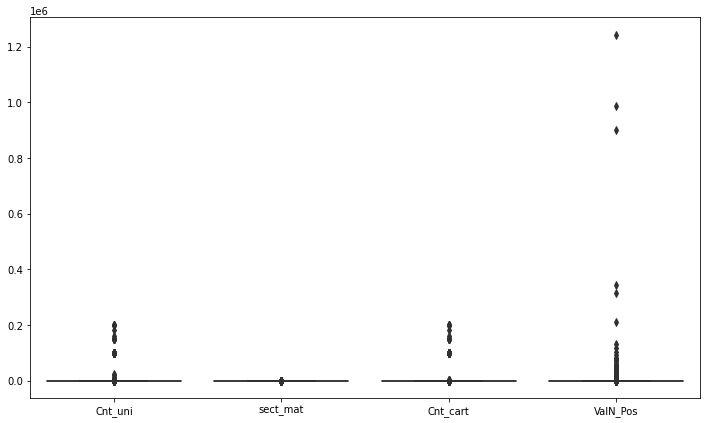

In [7]:
plt.figure(figsize=(12,7))
solo_num = datos_prueba.drop('Doc_vtas', axis=1)
solo_num = solo_num.drop('Solic', axis=1)
solo_num = solo_num.drop('Material', axis=1)
sns.boxplot(data= solo_num, palette="colorblind")

In [8]:
def outliers(df):
    Q1= df.quantile(0.25)
    Q3= df.quantile(0.75)
    IQR= Q3-Q1
    extreme= Q3+IQR*1.5
    outlier= df.query('@df>@extreme')
    outers= df.where(~df.isin(outlier), np.nan)
    return outers.isna().sum()

In [9]:
problem_prueba = outliers(datos_prueba)
problem_prueba

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\ops.py:455: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  res = self.func(left.value, right.value)


Doc_vtas          0
Fecha             0
Solic             0
Material          0
Cnt_uni      641796
sect_mat     130796
Cnt_cart    1421100
ValN_Pos    1272486
Moneda            0
dtype: int64

Existen valores aoutliers tanto en el valor neto como en la cantidad de cartones y las unidades, pero realmente no se eliminaran dado el escaso conocimiento que se tiene del negocio.

con lo anterior, los datos se encuentran limpios, no existen pedidos con registros negativos ni en la cantidad ni en los valores pagados

### Una vez validadas las variables, se creara una nueva variable llamada anomes que corresponde a los pedidos o ventas realizados para el año y el mes

In [10]:
datos_prueba['anomes']=datos_prueba['Fecha'].str[:7]

In [11]:
datos_prueba

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,anomes
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000000,347.76,COP,2021-11
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000000,781.40,COP,2021-11
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000000,309.05,COP,2021-11
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375000,124.59,COP,2021-11
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000000,478.87,COP,2021-11
...,...,...,...,...,...,...,...,...,...,...
12559896,7504718894,2022-04-08,1183780,54278,1.0,60,0.041667,35.74,COP,2022-04
12559897,7504718894,2022-04-08,1183780,54302,1.0,60,0.041667,44.40,COP,2022-04
12559898,7504718894,2022-04-08,1183780,54298,1.0,60,0.041667,44.40,COP,2022-04
12559899,7504718894,2022-04-08,1183780,24976,1.0,36,0.083333,80.67,COP,2022-04


Se convierte la fecha a date

In [12]:
datos_prueba['Fecha']= pd.to_datetime(datos_prueba['Fecha'], format= '%Y-%m-%d')

In [13]:
resumen_conteo= datos_prueba.groupby(['anomes','Solic'], as_index = False).agg({"Doc_vtas":"count",
                                                                                "Cnt_uni":"sum",
                                                                                "Cnt_cart":"sum",
                                                                               "ValN_Pos":"sum"})

In [14]:
resumen_conteo

,anomes,Solic,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos
0,2021-11,49128,86,443.0,51.416671,23071.16
1,2021-11,69792,18,67.0,1.804166,1351.91
2,2021-11,69868,46,193.0,5.816392,3296.16
3,2021-11,70430,20,34.0,1.445836,1155.01
4,2021-11,70566,37,152.0,4.480557,2437.33
...,...,...,...,...,...,...
565749,2022-07,18179654,15,27.0,1.931946,1403.30
565750,2022-07,18179660,24,78.0,6.305558,2662.01
565751,2022-07,18179662,8,10.0,1.616667,498.44
565752,2022-07,18179664,20,62.0,4.206549,3267.76


In [15]:
# Con lo anterior se realiza la descripcion de las variables
resumen_conteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565754 entries, 0 to 565753
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   anomes    565754 non-null  object 
 1   Solic     565754 non-null  int64  
 2   Doc_vtas  565754 non-null  int64  
 3   Cnt_uni   565754 non-null  float64
 4   Cnt_cart  565754 non-null  float64
 5   ValN_Pos  565754 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.9+ MB


In [16]:
lista_numericas=['Doc_vtas','Cnt_uni','Cnt_cart','ValN_Pos']

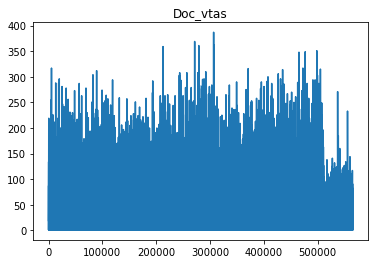

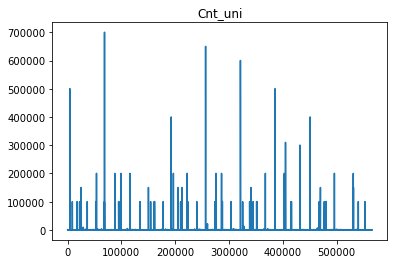

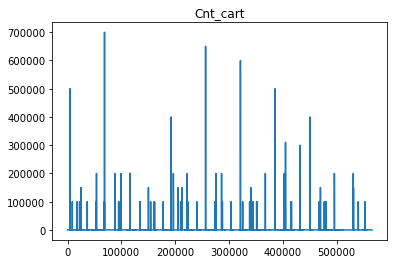

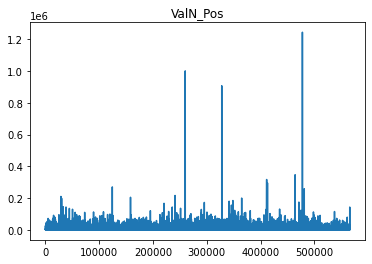

In [17]:
for l in lista_numericas:
    plt.plot(resumen_conteo[l])
    plt.title(l)
    plt.show()

En los graficos anteriores se mustra la distribucion de los pedidos acumulados por cliente y por mes, se puede ver mayor variabilidad tanto en la cantidad de pedidos realizados por los clientes (frecuencia), mientras que las unidades totales presentan menor variacion y los valores netos se ven afectados por los outliers.

In [18]:
conteo_por_cliente = resumen_conteo.groupby(['Solic'], as_index = False).agg({"Doc_vtas":"count"})
conteo_por_cliente.head()

,Solic,Doc_vtas
0,49128,9
1,69792,9
2,69838,1
3,69868,9
4,70334,3


In [19]:
conteo_por_fecha = resumen_conteo.groupby(['anomes'], as_index = False).agg({"Doc_vtas":"count"})
conteo_por_fecha

,anomes,Doc_vtas
0,2021-11,64370
1,2021-12,61998
2,2022-01,62037
3,2022-02,63814
4,2022-03,64868
5,2022-04,64381
6,2022-05,65359
7,2022-06,64799
8,2022-07,54128


In [20]:
# Esta variable permite validar para cada mes que existe en la base de datos, realizar el proceso de validacion de si existen o no comprar en los dos meses posteeriores
meses = conteo_por_fecha.anomes
meses

0    2021-11
1    2021-12
2    2022-01
3    2022-02
4    2022-03
5    2022-04
6    2022-05
7    2022-06
8    2022-07
Name: anomes, dtype: object

In [21]:
resumen_conteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565754 entries, 0 to 565753
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   anomes    565754 non-null  object 
 1   Solic     565754 non-null  int64  
 2   Doc_vtas  565754 non-null  int64  
 3   Cnt_uni   565754 non-null  float64
 4   Cnt_cart  565754 non-null  float64
 5   ValN_Pos  565754 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.9+ MB


## 4. Creacion la variable Target 

## Una vez realizada la agrupacion, se procede a crear el churn dependiendo de los meses que el cliente haya dejado de comprar, por lo que se crearon dos funciones, una para calcular el  mes y el año siguiente y otra para calcular si el cliente tiene o no pedidos en los meses siguientes. Segun la definicion tecnica del negocio.

In [22]:
#Esta funcion se encarga de calcular el mes y el año siguiente
def mes_sig(mes,anno):
    if mes == 12:
        annosig = int(anno) + 1 
        mes_s = 1
    else:
        mes_s = mes + 1
        annosig = anno
    if mes_s < 10:
        mes_sig = "0" + str(mes_s)
    else:
        mes_sig = str(mes_s)
    
    return  mes_sig, str(annosig)

In [23]:
# Esta funcion reaiza la comparacion de los clientes por mes, si existe en los dos meses siguientes pone cero, de lo contratio pone 1
# Este criterio esta definido por el negocio

def cliente_fugado(df_mes, def_mesSig, df_mesSigSig):
    
    df_mes['Churn']  =   df_mes['Solic'].isin(def_mesSig['Solic'])
    df_mes['Churn1']  =  df_mes['Solic'].isin(df_mesSigSig['Solic'])
    df_mes['Churn'] =    df_mes['Churn'].apply(lambda x: 0 if x == True else 1)
    df_mes['Churn1'] =   df_mes['Churn1'].apply(lambda x: 0 if x == True else 1)
    df_mes['ChurnTot'] = df_mes['Churn'] + df_mes['Churn1']
   
    return df_mes

In [24]:
# Script que revisa mes por mes si los clientes realizan pedidos en los dos  meses siguientes, de acuerdo con la definicion.
resumen = pd.DataFrame()

for mes in meses:
    mesAct = mes[-2:]
    AnoAct = mes[:4]
    datosMesActual= resumen_conteo[resumen_conteo["anomes"] == mes]
    # Se calculan El mes siguiente y los datos del mes siguiente
    val = mes_sig (int(mesAct),AnoAct)
    mesSig = val[0]
    AnoSig = val[1]
    AnoMesSig = AnoSig + "-" + mesSig
    datosMesSig= resumen_conteo[resumen_conteo["anomes"] == AnoMesSig]
    
    
    # Se calculan El mes siguiente y los datos del mes siguiente Siguiente
    val = mes_sig (int(mesSig), AnoSig)
    AnoMesSigSig = val[1] + "-" + val[0]
    datosMesSigSig= resumen_conteo[resumen_conteo["anomes"] == AnoMesSigSig]
    
    salida = cliente_fugado(datosMesActual,datosMesSig,datosMesSigSig )
    #esta variable acumula las validaciones realizadas para cada mes
    resumen = resumen.append(salida, ignore_index=True)
    

C:\Users\maesh\AppData\Local\Temp/ipykernel_3304/3555564967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['Churn']  =   df_mes['Solic'].isin(def_mesSig['Solic'])
C:\Users\maesh\AppData\Local\Temp/ipykernel_3304/3555564967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['Churn1']  =  df_mes['Solic'].isin(df_mesSigSig['Solic'])
C:\Users\maesh\AppData\Local\Temp/ipykernel_3304/3555564967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [25]:
resumen

,anomes,Solic,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Churn,Churn1,ChurnTot
0,2021-11,49128,86,443.0,51.416671,23071.16,0,0,0
1,2021-11,69792,18,67.0,1.804166,1351.91,0,0,0
2,2021-11,69868,46,193.0,5.816392,3296.16,0,0,0
3,2021-11,70430,20,34.0,1.445836,1155.01,0,0,0
4,2021-11,70566,37,152.0,4.480557,2437.33,0,0,0
...,...,...,...,...,...,...,...,...,...
565749,2022-07,18179654,15,27.0,1.931946,1403.30,1,1,2
565750,2022-07,18179660,24,78.0,6.305558,2662.01,1,1,2
565751,2022-07,18179662,8,10.0,1.616667,498.44,1,1,2
565752,2022-07,18179664,20,62.0,4.206549,3267.76,1,1,2


In [26]:
resumen.ChurnTot.value_counts()

0    379713
1    100739
2     85302
Name: ChurnTot, dtype: int64

## Para el calculo de los modelos Churn, se va a realizar con los clientes unicos que han realizado compras en el periodo de analisis excepto en los dos ulitmos meses

Para lo anterior, se procede a crear una variable llamada clientes, en los cuales se quitan los registros de los dos ultimos meses

In [27]:
clientes=resumen[resumen['anomes'] <= meses[meses.count()-3]]
clientes

,anomes,Solic,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Churn,Churn1,ChurnTot
0,2021-11,49128,86,443.0,51.416671,23071.16,0,0,0
1,2021-11,69792,18,67.0,1.804166,1351.91,0,0,0
2,2021-11,69868,46,193.0,5.816392,3296.16,0,0,0
3,2021-11,70430,20,34.0,1.445836,1155.01,0,0,0
4,2021-11,70566,37,152.0,4.480557,2437.33,0,0,0
...,...,...,...,...,...,...,...,...,...
446822,2022-05,18172492,22,51.0,2.249996,824.76,0,0,0
446823,2022-05,18172494,7,7.0,0.444447,360.66,0,0,0
446824,2022-05,18172498,6,6.0,0.366666,312.26,0,0,0
446825,2022-05,18172544,51,267.0,9.081116,5917.64,1,0,1


In [28]:
clientes.ChurnTot.value_counts()

0    379713
1     49572
2     17542
Name: ChurnTot, dtype: int64

## Una vez se tiene el periodo, se extraen los clientes para con esta informacion realiaar el modelado.

In [29]:
base_clientes=clientes.groupby(['Solic'], as_index = False).agg({
                                                                "ChurnTot":"max",
                                                               "Doc_vtas":"sum",
                                                               "Cnt_uni":"sum",
                                                               "Cnt_cart":"sum",
                                                                "ValN_Pos":"sum"})

In [30]:
base_clientes

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos
0,49128,0,412,2061.0,280.298608,124830.59
1,69792,0,166,453.0,18.756949,11253.21
2,69868,0,322,1056.0,36.326960,23169.06
3,70334,2,47,101.0,9.063893,6416.46
4,70430,0,148,306.0,16.258070,10853.09
...,...,...,...,...,...,...
78128,18172492,0,22,51.0,2.249996,824.76
78129,18172494,0,7,7.0,0.444447,360.66
78130,18172498,0,6,6.0,0.366666,312.26
78131,18172544,1,51,267.0,9.081116,5917.64


In [31]:
base_clientes.ChurnTot.value_counts()

0    43612
1    18391
2    16130
Name: ChurnTot, dtype: int64

### Se procede a crear la variable target Churn, en la cual si se tiene 0 o 1 mes, se marca como uno y los que tienen dos meses se le pone 1

In [32]:
base_clientes['ChurnTot'] = base_clientes['ChurnTot'].replace({0:0,1:0,2:1})
#base_clientes['ChurnTot'] = base_clientes.apply(lambda x: if (x['financiacion']=='SI' and pd.notna(x['imp_financ']) and pd.isna(x['descuentos'])) 
#                                                    else (x['descuentos']), axis=1)

In [33]:
base_clientes.ChurnTot.value_counts()

0    62003
1    16130
Name: ChurnTot, dtype: int64

In [34]:
X =  base_clientes.drop('ChurnTot', axis=1)
y = base_clientes['ChurnTot']

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78133 entries, 0 to 78132
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Solic     78133 non-null  int64  
 1   Doc_vtas  78133 non-null  int64  
 2   Cnt_uni   78133 non-null  float64
 3   Cnt_cart  78133 non-null  float64
 4   ValN_Pos  78133 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.0 MB


In [36]:
corr = abs(base_clientes.corr())
corr[['ChurnTot']].sort_values(by = 'ChurnTot',ascending = False).style.background_gradient()

,ChurnTot
ChurnTot,1.000000
Doc_vtas,0.329544
ValN_Pos,0.179194
Solic,0.097700
Cnt_uni,0.012733
Cnt_cart,0.004756


Revisando las correlaciones, se observa que la frecuencia de compras es super importante (tiene una mayor correlacion), seguida por el valor de la factura neta pagada. Las demas variables no no tienen mucha correlacion.

##  5. Correr un modelo inicial y evaluar sus resultados.

Tras haber hecho una limpieza rápida de los datos, se saca el primer modelo, utilizando la informacion disponible, vamos a utilizar los siguientes modelos:

- La regresión logística se utiliza generalmente para fines de clasificación. A diferencia de la regresión lineal, la variable dependiente solo puede tomar un número limitado de valores, es decir, la variable dependiente es categórica tal y como es nuestra variable y del modelo (0,1)
- Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta. Son fáciles de interpretar aun cuando las relaciones entre predictores son complejas y se aplican casos de calsificación. Los modelos más típicamente conocidos de clasifcicación son RandomForest y DecisionTrees


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X ,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

### - Logistic Regression

In [38]:
#from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state=0, max_iter=300, solver='newton-cg').fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [39]:
print(model_log)

LogisticRegression(max_iter=300, random_state=0, solver='newton-cg')


In [40]:
y_pred_log = model_log.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     12401
           1       0.72      0.44      0.55      3226

    accuracy                           0.85     15627
   macro avg       0.79      0.70      0.73     15627
weighted avg       0.84      0.85      0.83     15627



### - DecisionTree 

In [42]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(X_train, y_train)
predictions= model_dt.predict(X_test)
print('Accuracy Decision Tree:', accuracy_score(y_test, predictions))

Accuracy Decision Tree: 0.8084725155180137


In [43]:
y_pred_dt = model_dt.predict(X_test)


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12401
           1       0.53      0.56      0.55      3226

    accuracy                           0.81     15627
   macro avg       0.71      0.72      0.71     15627
weighted avg       0.81      0.81      0.81     15627



### - RandomForest

In [45]:

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(bootstrap= False,criterion=  'gini',max_depth=  16,n_estimators= 300).fit(X, y)
y_pred_rf = model_rf.predict(X_test)

In [46]:
model_rf.feature_importances_

array([0.18386683, 0.28974039, 0.14667304, 0.12765545, 0.2520643 ])

In [47]:
model_rf.feature_names_in_

array(['Solic', 'Doc_vtas', 'Cnt_uni', 'Cnt_cart', 'ValN_Pos'],
      dtype=object)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12401
           1       0.98      0.76      0.85      3226

    accuracy                           0.95     15627
   macro avg       0.96      0.88      0.91     15627
weighted avg       0.95      0.95      0.94     15627



Los modelos iniciales poseen buen ajuste. Sin embargo, mas adelante se trataran de mejorar con un Feeture Engineering (transformacion de variables) y verifircando overfiting (sobreajuste)

## 4.1 Evaluación del modelo

Al tratarse de clases muy desbalanceadas debemos prestar mayor atención a la curva de precisión que evalua el rendimiento de la clase positiva

In [49]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

### Modelo logístico

matriz de confusión
[[11849   552]
 [ 1802  1424]]
accuracy
0.849363281499968
precision
0.7206477732793523
recall
0.44141351518908867
f1
0.5474817377931565
AUC
0.6984504879388713


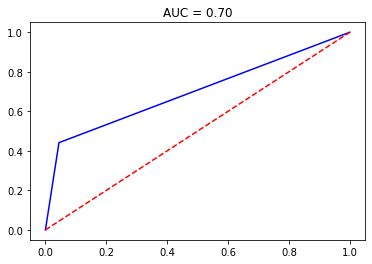

In [50]:
saca_metricas(y_test, y_pred_log)

Como se puede observar, el modelo tiene 84% de accuracy, una precision del 72%, recall de 44% y un AUC del 70%. Este modelo tiene muy buena pinta y se puede mejorar con otros modelos como son los arboles o Random Forest

### Modelo DecisionTree

matriz de confusión
[[10829  1572]
 [ 1421  1805]]
accuracy
0.8084725155180137
precision
0.5344980752146876
recall
0.5595164290142591
f1
0.5467211873390884
AUC
0.7163762291833654


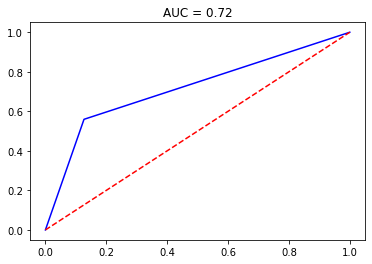

In [51]:
saca_metricas(y_test, y_pred_dt)

El arbol de decision presenta un mejor AUC (71%), mientras que el accuracy disminuye a un 80%, una precision del 53%, recall de 54%. 

### Modelo RandomForest

matriz de confusión
[[12343    58]
 [  774  2452]]
accuracy
0.9467588148716964
precision
0.9768924302788845
recall
0.7600743955362679
f1
0.8549511854951185
AUC
0.8776986766811249


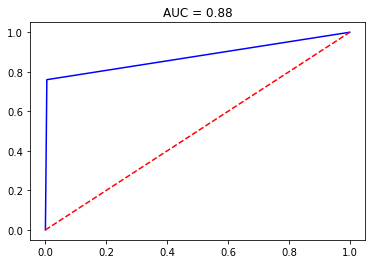

In [52]:
saca_metricas(y_test, y_pred_rf)

El Random Forest presenta un mejor AUC (88%), el accuracy 94%, una precision del 97%, recall de 76%. Se observa un modelo mucho mejor que los anteriores

## 6) Realizar una mejora del modelo



Para realizar una mejora al modelo anterior, se van a realizar los siguientes procesos:
    
    1.  Comprobacion de Overfit
    2. 'Feature engineering'. 

### 5.1) Comprobación del Overfitting

Por lo visto nuestros modelos vemos que no clasifican del todo bien a partir de las variables seleccionadas y eso se debe al desbalanceo de nuestras muestras

Se produce cuando el modelo funciona bastante bien con el set de entrenamiento pero tiene un desempeño pobre con el set de validación. 

Los siguientes son temas a tener en cuenta en los modelos de maching Learning:

- El proceso de diseño de un modelo de Machine Learning implica el uso de dos sets de datos: entrenamiento y validación.
Generalmente el set de entrenamiento usa aproximadamente el 80% de los datos disponibles, mientras que el de validación usa el 20% restante.
- Un modelo con underfitting es aquel en donde los errores tanto de entrenamiento como de validación son similares y relativamente altos.
- Por otra parte, en un modelo con overfitting se obtiene un error de entrenamiento relativamente bajo y uno de validación relativamente alto.
- Al desarrollar un modelo de Machine Learning se debe evitar cualquiera de los dos extremos anteriores (underfitting u overfitting).
- Lo anterior implica que el modelo ideal será aquel que permita obtener un error bajo en ambos sets (entrenamiento y validación).

fuente: https://www.codificandobits.com/blog/underfitting-y-overfitting/

Counts Class 0:  49602
Counts Class 1:  12904
Proportion of class 0:  0.7935558186414104
Proportion of class 1:  0.20644418135858958


<AxesSubplot:>

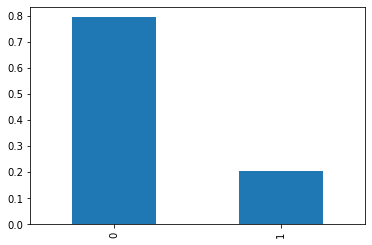

In [53]:
target_count= y_train.value_counts()
print('Counts Class 0: ',target_count[0])
print('Counts Class 1: ',target_count[1])
class_frequency = y_train.value_counts(normalize=True)
print('Proportion of class 0: ',class_frequency[0])
print('Proportion of class 1: ',class_frequency[1])
class_frequency.plot(kind='bar')

Las categorias de la variable target son de casi 79% de la categoria 1 y del 20% categoria 0, esto quiere decir que nuestro modelo esta un poco desbalanceado

### 5.2) Feature Engineering

En esta sección nos vamos a concentrar en validar las variables y crear unas nuevas a partir de las iniciales para tratar de mejorar el modelo propuesto.

Primeramente, se va a validar la correlación que tienen las actuales variables con la target. Evidentemente existe una baja correlación con la variable objetivo.

In [54]:
base_clientes

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos
0,49128,0,412,2061.0,280.298608,124830.59
1,69792,0,166,453.0,18.756949,11253.21
2,69868,0,322,1056.0,36.326960,23169.06
3,70334,1,47,101.0,9.063893,6416.46
4,70430,0,148,306.0,16.258070,10853.09
...,...,...,...,...,...,...
78128,18172492,0,22,51.0,2.249996,824.76
78129,18172494,0,7,7.0,0.444447,360.66
78130,18172498,0,6,6.0,0.366666,312.26
78131,18172544,0,51,267.0,9.081116,5917.64


In [55]:

base_clientes1 = base_clientes
base_clientes1 = base_clientes1.drop('Solic', axis=1)
base_clientes1

,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos
0,0,412,2061.0,280.298608,124830.59
1,0,166,453.0,18.756949,11253.21
2,0,322,1056.0,36.326960,23169.06
3,1,47,101.0,9.063893,6416.46
4,0,148,306.0,16.258070,10853.09
...,...,...,...,...,...
78128,0,22,51.0,2.249996,824.76
78129,0,7,7.0,0.444447,360.66
78130,0,6,6.0,0.366666,312.26
78131,0,51,267.0,9.081116,5917.64


Voy a usar la función 'proporciones_final()' para identificar patrones que los valores de las variables tienen con respecto a la objetivo

In [56]:
def proporciones_final(var,target,df):

    proporcion = pd.DataFrame()

    proporcion['%Proporcion'] = df[target].groupby(df[var]).mean()*100 
    proporcion['Conteo'] = df[target].groupby(df[var]).count() 
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%Proporcion']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%Proporcion'].values, linestyle='-', linewidth=2.0,color='r')
        plt.tight_layout()        
    
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%Proporcion',data=proporcion_filtered, fit_reg=True,ci=None) 

Le paso a la función las variables que tiene menos de 12 valores únicos.


In [57]:
base_clientes1.columns

Index(['ChurnTot', 'Doc_vtas', 'Cnt_uni', 'Cnt_cart', 'ValN_Pos'], dtype='object')

In [58]:
def visualizar_variables_numericas_binarizadas(dataset, q, target='ChurnTot'):
    sin_la_target=dataset.loc[:, dataset.columns != target]
    new_vars={}
    values=[i for i in range(q)]
    for i in range(len(sin_la_target.columns)):
        new_vars[str(sin_la_target.columns[i])]=pd.qcut(dataset[str(sin_la_target.columns[i])], 
                                                         q=q, labels=values)
    vars_to_plot=pd.DataFrame(new_vars).fillna(0) 
    target=pd.DataFrame(dataset[target])
    new_continuous_vars=pd.concat([target, vars_to_plot.reindex(target.index)], axis=1)  
    for i in vars_to_plot.columns:
        proporciones_final(i, 'ChurnTot', new_continuous_vars) 

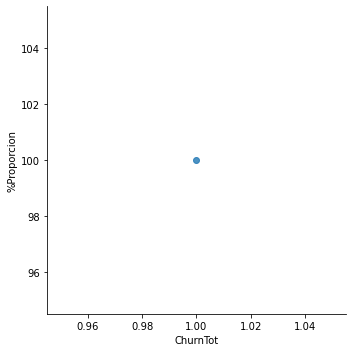

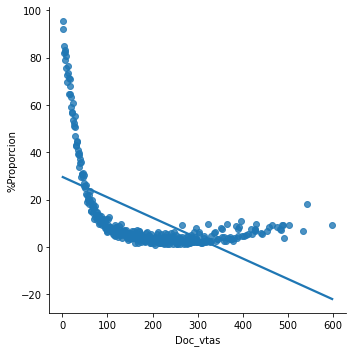

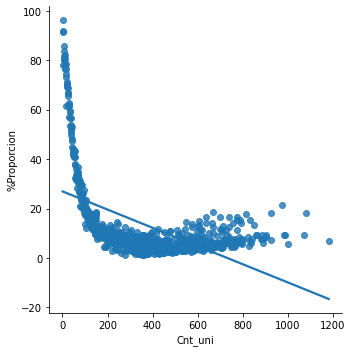

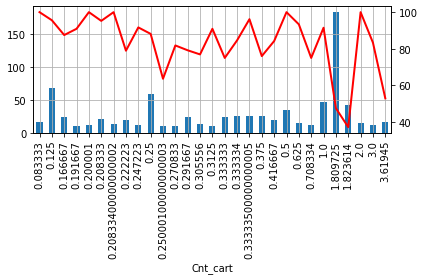

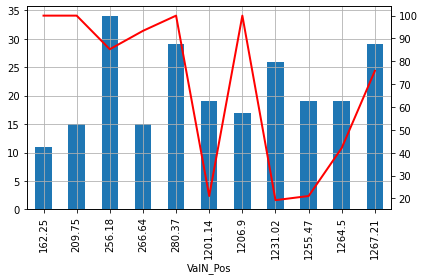

In [59]:
for i in base_clientes1.columns:
    proporciones_final (i, 'ChurnTot', base_clientes1)

##### **Observaciones:**

- La variable **Frecuencia Total de ventas:** Doc_vtas y **Cantidad de unidades vendidos total:**, Cnt_uni  siguen un comportamiento similar.

- **Valor neto total:** ValN_Pos, sigue una distribucion no aleatoria, se podria analizar por tramos para verificar si existe una diferencia entra los clientes compran mayores valores frente a los que facturan poco con relacion al churn.

- **Cantidad de cartones vendidos total:** Cnt_cart, sigue una distribucion no aleatoria, existe una diferencia entra los clientes compran mayores valores frente a los que facturan poco con relacion al churn.

Se crearan variables para tratar mejorar el modelo asi:

- cantidad promedio de compra por cliente
- valor neto promedio por cliente
- Se va a calcular una variable antiguedad tomando como referencia la primera fecha de compra sobre la ultima regisgtrada en la base de datos

## Para la creacion de las variables 

In [60]:
datos_prueba

,Doc_vtas,Fecha,Solic,Material,Cnt_uni,sect_mat,Cnt_cart,ValN_Pos,Moneda,anomes
0,7503277849,2021-11-01,18134244,28424,72.0,42,1.000000,347.76,COP,2021-11
1,7503277849,2021-11-01,18134244,26780,6.0,42,6.000000,781.40,COP,2021-11
2,7503277849,2021-11-01,18134244,28846,72.0,42,1.000000,309.05,COP,2021-11
3,7503277849,2021-11-01,18134244,6572,18.0,42,0.375000,124.59,COP,2021-11
4,7503277849,2021-11-01,18134244,28850,1.0,42,1.000000,478.87,COP,2021-11
...,...,...,...,...,...,...,...,...,...,...
12559896,7504718894,2022-04-08,1183780,54278,1.0,60,0.041667,35.74,COP,2022-04
12559897,7504718894,2022-04-08,1183780,54302,1.0,60,0.041667,44.40,COP,2022-04
12559898,7504718894,2022-04-08,1183780,54298,1.0,60,0.041667,44.40,COP,2022-04
12559899,7504718894,2022-04-08,1183780,24976,1.0,36,0.083333,80.67,COP,2022-04


### Se crea la variable antiguedad con los datos iniciales y posteriormente se incluye en los datos para el modelado

In [68]:
fechasMaxcliente=datos_prueba.groupby(['Solic'], as_index = False).agg({"Fecha":"max"})
fechasMaxcliente=fechasMaxcliente.rename(columns={'Fecha':'FechaMax'})

In [69]:
fechasMincliente=datos_prueba.groupby(['Solic'], as_index = False).agg({"Fecha":"min"})
fechasMincliente=fechasMincliente.rename(columns={'Fecha':'FechaMin'})

In [70]:
antiguedad = fechasMaxcliente.merge(fechasMincliente)
antiguedad ['Antiguedad'] = antiguedad ['FechaMax'] - antiguedad ['FechaMin']
antiguedad

,Solic,FechaMax,FechaMin,Antiguedad
0,49128,2022-07-11,2021-11-02,251 days
1,69792,2022-07-05,2021-11-05,242 days
2,69838,2022-07-12,2022-07-12,0 days
3,69868,2022-07-05,2021-11-09,238 days
4,70334,2022-05-31,2022-02-26,94 days
...,...,...,...,...
80289,18179654,2022-07-14,2022-07-14,0 days
80290,18179660,2022-07-15,2022-07-14,1 days
80291,18179662,2022-07-14,2022-07-14,0 days
80292,18179664,2022-07-14,2022-07-14,0 days


In [71]:
# Se le adiciona la antiguedad del cliente
base_clientes = base_clientes.merge(antiguedad, how='left')
base_clientes = base_clientes.drop('FechaMax', axis=1)
base_clientes = base_clientes.drop('FechaMin', axis=1)
base_clientes

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Antiguedad
0,49128,0,412,2061.0,280.298608,124830.59,251 days
1,69792,0,166,453.0,18.756949,11253.21,242 days
2,69868,0,322,1056.0,36.326960,23169.06,238 days
3,70334,1,47,101.0,9.063893,6416.46,94 days
4,70430,0,148,306.0,16.258070,10853.09,245 days
...,...,...,...,...,...,...,...
78128,18172492,0,22,51.0,2.249996,824.76,42 days
78129,18172494,0,7,7.0,0.444447,360.66,42 days
78130,18172498,0,6,6.0,0.366666,312.26,43 days
78131,18172544,0,51,267.0,9.081116,5917.64,36 days


Se crea la variable cantidad promedio y valor neto promedio

In [72]:
base_clientes['CantPedidaPromedio']=base_clientes['Cnt_uni']/base_clientes['Doc_vtas']
base_clientes['ValorNetoPromedio']=base_clientes['ValN_Pos']/base_clientes['Doc_vtas']
base_clientes ['Antiguedad']  = base_clientes ['Antiguedad'].astype(str) ## convirtiendo a string
base_clientes['Antiguedad'] = base_clientes.Antiguedad.apply(lambda x: float(x[:-5]))  # se le quita la palabra days
base_clientes

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Antiguedad,CantPedidaPromedio,ValorNetoPromedio
0,49128,0,412,2061.0,280.298608,124830.59,251.0,5.002427,302.986869
1,69792,0,166,453.0,18.756949,11253.21,242.0,2.728916,67.790422
2,69868,0,322,1056.0,36.326960,23169.06,238.0,3.279503,71.953602
3,70334,1,47,101.0,9.063893,6416.46,94.0,2.148936,136.520426
4,70430,0,148,306.0,16.258070,10853.09,245.0,2.067568,73.331689
...,...,...,...,...,...,...,...,...,...
78128,18172492,0,22,51.0,2.249996,824.76,42.0,2.318182,37.489091
78129,18172494,0,7,7.0,0.444447,360.66,42.0,1.000000,51.522857
78130,18172498,0,6,6.0,0.366666,312.26,43.0,1.000000,52.043333
78131,18172544,0,51,267.0,9.081116,5917.64,36.0,5.235294,116.032157


In [73]:
base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78133 entries, 0 to 78132
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solic               78133 non-null  int64  
 1   ChurnTot            78133 non-null  int64  
 2   Doc_vtas            78133 non-null  int64  
 3   Cnt_uni             78133 non-null  float64
 4   Cnt_cart            78133 non-null  float64
 5   ValN_Pos            78133 non-null  float64
 6   Antiguedad          78133 non-null  float64
 7   CantPedidaPromedio  78133 non-null  float64
 8   ValorNetoPromedio   78133 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 6.0 MB


#### Evalúa la correlación de todas las variables y veo si las nuevas variables creadas están más correlacionadas que las antiguas

In [74]:
corr = abs(base_clientes.corr()) #since we have included a new var
corr[['ChurnTot']].sort_values(by = 'ChurnTot',ascending = False).style.background_gradient() 


,ChurnTot
ChurnTot,1.000000
Antiguedad,0.608608
Doc_vtas,0.329544
ValN_Pos,0.179194
Solic,0.097700
ValorNetoPromedio,0.028817
Cnt_uni,0.012733
Cnt_cart,0.004756
CantPedidaPromedio,0.000100


In [75]:
base_clientes.isnull().sum() 

Solic                 0
ChurnTot              0
Doc_vtas              0
Cnt_uni               0
Cnt_cart              0
ValN_Pos              0
Antiguedad            0
CantPedidaPromedio    0
ValorNetoPromedio     0
dtype: int64

In [90]:
# Volvemos a generar train y test

X =  base_clientes.drop('ChurnTot', axis=1)
y = base_clientes['ChurnTot']


### 5.3) Seleccion de Variables

**Realizo seleccion de variable a traves del VIF para detectar Multicolinearidad.** 

Uno de los principales beneficios de la selección de variables esta plasmado por la famosa frase "Menos es más" del arquitecto Ludwig Mies van der Rohe, precursor del minimalismo. Menos atributos son deseables ya que reduce la complejidad del modelo, y un modelo más simple es más fácil de entender y explicar.


para ello, ejecuto elmetodo VIF, examino que variables fueron eliminadas por VIF y verifico.

El valor del VIF es siempre positivo y crece en un conjunto de datos a medida que aumenta la multicolinealidad entre las características. En caso de que en un conjunto de características exista multicolinealidad perfecta, es decir, que una característica se pueda explicar perfectamente mediante la combinación lineal del resto, el valor será infinito, ya que, en tal caso, el Ri^2 de la regresión será igual la unidad.

**En general se suele emplear el criterio expuesto en la siguiente tabla**:

**Valor de VIF	Grado de Muticolinealidad**

Hasta 5	     Débil/Moderado

De 5 a 10	 Elevado

Mayor a 10	 Muy elevado


In [93]:
var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(X)

In [78]:
X.shape[1] ## variables principales


8

In [79]:
X.columns

Index(['Solic', 'Doc_vtas', 'Cnt_uni', 'Cnt_cart', 'ValN_Pos', 'Antiguedad',
       'CantPedidaPromedio', 'ValorNetoPromedio'],
      dtype='object')

In [80]:
x_var.shape[1] ## vairables finales

8

In [81]:
np.asarray(list(X))[var_th.get_support()]

array(['Solic', 'Doc_vtas', 'Cnt_uni', 'Cnt_cart', 'ValN_Pos',
       'Antiguedad', 'CantPedidaPromedio', 'ValorNetoPromedio'],
      dtype='<U18')

In [82]:
base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78133 entries, 0 to 78132
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Solic               78133 non-null  int64  
 1   ChurnTot            78133 non-null  int64  
 2   Doc_vtas            78133 non-null  int64  
 3   Cnt_uni             78133 non-null  float64
 4   Cnt_cart            78133 non-null  float64
 5   ValN_Pos            78133 non-null  float64
 6   Antiguedad          78133 non-null  float64
 7   CantPedidaPromedio  78133 non-null  float64
 8   ValorNetoPromedio   78133 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 6.0 MB


In [83]:
from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
datos_vif = base_clientes.copy(deep = True)
features = list(datos_vif.columns)
features.remove('ChurnTot')
datos_vif = datos_vif[features]

for i in range(len(features)): # HAlla el VIF de cada variable, de todas las que se pasan de 5, se elimina. La mayor de todas y se vuelve a calcular todo
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = datos_vif[fet]
    y = base_clientes[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable Solic es: 1.0900292486617644
El valor del VIF para la variable Doc_vtas es: 4.027499747893174
El valor del VIF para la variable Cnt_uni es: 3813.2336962162863
El valor del VIF para la variable Cnt_cart es: 3784.1399461814635
El valor del VIF para la variable ValN_Pos es: 2.7503678542034917
El valor del VIF para la variable Antiguedad es: 1.3386971955204825
El valor del VIF para la variable CantPedidaPromedio es: 5.356651252831904
El valor del VIF para la variable ValorNetoPromedio es: 1.2211639501857623


Las variables candidatas a eliminar por multicolinealidad son: *'Cnt_uni'* y *cnt_cart*

In [85]:
base_clientes.ChurnTot.value_counts()

0    62003
1    16130
Name: ChurnTot, dtype: int64

In [94]:
# Volvemos a generar train y test

X =  base_clientes.drop('ChurnTot', axis=1)
y = base_clientes['ChurnTot']

Segun este criterio se eliminaron las correlaciones, vamos a volver a generar los modelos. Para ello vamos a realizar un  un grid Seach, para encontratr el mejor modelo el mejor Random Forest.


#### Volvemos a generar las muestras Train y Test


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X ,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

In [97]:
y

0        0
1        0
2        0
3        1
4        0
        ..
78128    0
78129    0
78130    0
78131    0
78132    1
Name: ChurnTot, Length: 78133, dtype: int64

In [96]:
X


,Solic,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Antiguedad,CantPedidaPromedio,ValorNetoPromedio
0,49128,412,2061.0,280.298608,124830.59,251.0,5.002427,302.986869
1,69792,166,453.0,18.756949,11253.21,242.0,2.728916,67.790422
2,69868,322,1056.0,36.326960,23169.06,238.0,3.279503,71.953602
3,70334,47,101.0,9.063893,6416.46,94.0,2.148936,136.520426
4,70430,148,306.0,16.258070,10853.09,245.0,2.067568,73.331689
...,...,...,...,...,...,...,...,...
78128,18172492,22,51.0,2.249996,824.76,42.0,2.318182,37.489091
78129,18172494,7,7.0,0.444447,360.66,42.0,1.000000,51.522857
78130,18172498,6,6.0,0.366666,312.26,43.0,1.000000,52.043333
78131,18172544,51,267.0,9.081116,5917.64,36.0,5.235294,116.032157


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42, stratify=y)

In [99]:
grid_param = {
    'n_estimators': [10, 20, 30, 80, 90],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [4,5,6,7,8,9,10,12,14,16]
}

### Modelo de regresion

In [100]:
classifier = LogisticRegression(solver ="liblinear" ,max_iter=1000).fit(X_train, y_train)
y_pred     = classifier.predict(X_test) 

In [101]:
classifier2 = RandomForestClassifier(max_depth = 8).fit(X_train, y_train)
y_pred2    = classifier2.predict(X_test)

In [102]:
from sklearn.model_selection import GridSearchCV

model_grid = GridSearchCV(estimator=classifier2,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1)

In [ ]:
model_grid.fit(X_train, y_train) ## No se alcanzo a ejecutar este grid search por falta de tiempo

In [121]:
print(model_grid.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print(model_grid.best_score_)

In [109]:
classifier2 = RandomForestClassifier(max_depth= 4, bootstrap= True, n_estimators= 90, criterion= 'gini').fit(X_train, y_train)
y_pred2    = classifier2.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     12401
           1       0.83      0.59      0.69      3226

    accuracy                           0.89     15627
   macro avg       0.87      0.78      0.81     15627
weighted avg       0.89      0.89      0.88     15627



In [120]:
classifier2.feature_importances_

array([0.09529125, 0.22863199, 0.10588661, 0.08562892, 0.16757941,
       0.30221606, 0.01163043, 0.00313533])

In [118]:
classifier2.feature_names_in_

array(['Solic', 'Doc_vtas', 'Cnt_uni', 'Cnt_cart', 'ValN_Pos',
       'Antiguedad', 'CantPedidaPromedio', 'ValorNetoPromedio'],
      dtype=object)

matriz de confusión
[[12020   381]
 [ 1314  1912]]
accuracy
0.8915338836628911
precision
0.8338421282163105
recall
0.592684438933664
f1
0.6928791447726037
AUC
0.7809805550849273


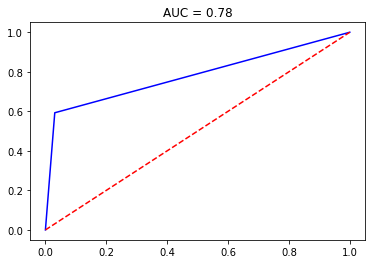

In [119]:
saca_metricas(y_test, y_pred2)

**Candidatos a dejar la empresa**:
1. Clientes con pocas antiguedad').
2. Clientes con incidencias/reclamaciones (variable: incidencia).
4. Clientes que no tienen ningún tipo de descuento (variable: descuentos).
5. Clientes sin financiacion.
6. Personas jovenes

## 7) Conclusión

Encuentro que el mejor modelo es el que resulta del arbol de decision *Random Forest*. Lo anterior, porque me clasifica mejor que el resto en calidad **(AUC-ROC~ 0.77)** y ademas, presenta un mejor resultado, tiene un **(accuracy ~ 0.96)**.

Adicionalmente, balancea mejor la detección de falsos positivos y falsos negtivos. Por tanto no es tanto fiarse del **score** sino cómo de fiable es el resultado que genera a la hora de clasificar positivos y negativos.

## 8) Predecir los clientes de la cosecha de enero que más probabilidad tienen de cambiarse de operadora

Vamos a ver como funciona nuestro mejor modelo para una nueva cosecha, en este caso enero. Para ello es necesario aplicar las mismas transformaciones hechas anteriormente y lo obtengo del **Modelo ganador**.

### 8.1) Prediccion 

In [123]:
#Prediccion para los meses dos ulitmos meses
clientes=resumen[resumen['anomes'] > meses[meses.count()-3]]
clientes

,anomes,Solic,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Churn,Churn1,ChurnTot
446827,2022-06,49128,48,190.0,40.333333,15192.98,0,1,1
446828,2022-06,69792,24,44.0,1.948612,1367.87,0,1,1
446829,2022-06,69868,33,126.0,3.243058,3151.65,0,1,1
446830,2022-06,70430,9,9.0,0.623613,488.94,0,1,1
446831,2022-06,70566,28,62.0,2.477504,2208.93,0,1,1
...,...,...,...,...,...,...,...,...,...
565749,2022-07,18179654,15,27.0,1.931946,1403.30,1,1,2
565750,2022-07,18179660,24,78.0,6.305558,2662.01,1,1,2
565751,2022-07,18179662,8,10.0,1.616667,498.44,1,1,2
565752,2022-07,18179664,20,62.0,4.206549,3267.76,1,1,2


In [124]:
base_clientes_predict=clientes.groupby(['Solic'], as_index = False).agg({
                                                                "ChurnTot":"max",
                                                               "Doc_vtas":"sum",
                                                               "Cnt_uni":"sum",
                                                               "Cnt_cart":"sum",
                                                                "ValN_Pos":"sum"})

In [126]:
# Se le adiciona la antiguedad del cliente
base_clientes_predict = base_clientes_predict.merge(antiguedad, how='left')
base_clientes_predict = base_clientes_predict.drop('FechaMax', axis=1)
base_clientes_predict = base_clientes_predict.drop('FechaMin', axis=1)
base_clientes_predict

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Antiguedad
0,49128,2,80,365.0,60.652776,24772.78,251 days
1,69792,2,29,50.0,2.295835,1639.56,242 days
2,69838,2,17,116.0,5.388889,2359.99,0 days
3,69868,2,59,181.0,5.218062,5121.19,238 days
4,70430,2,22,38.0,9.820837,2032.04,245 days
...,...,...,...,...,...,...,...
67755,18179654,2,15,27.0,1.931946,1403.30,0 days
67756,18179660,2,24,78.0,6.305558,2662.01,1 days
67757,18179662,2,8,10.0,1.616667,498.44,0 days
67758,18179664,2,20,62.0,4.206549,3267.76,0 days


In [127]:
base_clientes_predict['CantPedidaPromedio']=base_clientes_predict['Cnt_uni']/base_clientes['Doc_vtas']
base_clientes_predict['ValorNetoPromedio']=base_clientes_predict['ValN_Pos']/base_clientes['Doc_vtas']
base_clientes_predict ['Antiguedad']  = base_clientes_predict ['Antiguedad'].astype(str) ## convirtiendo a string
base_clientes_predict['Antiguedad'] = base_clientes_predict.Antiguedad.apply(lambda x: float(x[:-5]))  # se le quita la palabra days
base_clientes_predict

,Solic,ChurnTot,Doc_vtas,Cnt_uni,Cnt_cart,ValN_Pos,Antiguedad,CantPedidaPromedio,ValorNetoPromedio
0,49128,2,80,365.0,60.652776,24772.78,251.0,0.885922,60.128107
1,69792,2,29,50.0,2.295835,1639.56,242.0,0.301205,9.876867
2,69838,2,17,116.0,5.388889,2359.99,0.0,0.360248,7.329161
3,69868,2,59,181.0,5.218062,5121.19,238.0,3.851064,108.961489
4,70430,2,22,38.0,9.820837,2032.04,245.0,0.256757,13.730000
...,...,...,...,...,...,...,...,...,...
67755,18179654,2,15,27.0,1.931946,1403.30,0.0,0.221311,11.502459
67756,18179660,2,24,78.0,6.305558,2662.01,1.0,0.158537,5.410589
67757,18179662,2,8,10.0,1.616667,498.44,0.0,0.263158,13.116842
67758,18179664,2,20,62.0,4.206549,3267.76,0.0,0.673913,35.519130


In [129]:
# le quitamos la variable churn
base_clientes_pred =base_clientes_predict.drop('ChurnTot', axis=1)

In [146]:
prediccion = classifier2.predict_proba(base_clientes_pred)[:,1]

In [147]:
prediccion

array([0.05393328, 0.41407571, 0.71023848, ..., 0.57746661, 0.42558324,
       0.53264528])

In [148]:
prediccion = (pd.DataFrame(prediccion,columns=['probabilidad'],index=base_clientes_pred.index))
prediccion.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [149]:
prediccion.head()

,probabilidad
42463,0.945351
46704,0.945351
55865,0.945351
42133,0.945351
50305,0.944356


In [152]:
# Guardar en ur archivo la prediccion
prediccion.to_csv('./datos/prediccion.csv') 


Finalmente tenemos un modelo con hasta una probabilidad entorno al 60% de los casos de predecir clientes más probables a marcharse de la compañía

In [143]:
features= base_clientes.drop(['ChurnTot'], axis=1)

feature_list = list(features.columns)
importances = list(classifier2.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Antiguedad           Importance: 0.3022
Variable: Doc_vtas             Importance: 0.2286
Variable: ValN_Pos             Importance: 0.1676
Variable: Cnt_uni              Importance: 0.1059
Variable: Solic                Importance: 0.0953
Variable: Cnt_cart             Importance: 0.0856
Variable: CantPedidaPromedio   Importance: 0.0116
Variable: ValorNetoPromedio    Importance: 0.0031


[None, None, None, None, None, None, None, None]

# IMPORTANCIA DE LAS VARIABLES Y CONCLUSION FINAL:



Las variable mas determinantes en la fuga de clientes para la compañía Colombina son

- **Antiguedad**, Antiguedad
- **Doc_vtas**, frecuencia de compra
- **ValN_Pos**,  Valor neto pagado

